In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load Dataset

In [3]:
df = pd.read_csv('emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


No missing values :)

### Visualize Dataset

In [6]:
df.spam.value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [8]:
print(f'Spam Percentage: {len(df[df.spam == 1]) / len(df.spam) * 100:.3f}')
print(f'Not spam Percentage: {len(df[df.spam == 0]) / len(df.spam) * 100:.3f}')

Spam Percentage: 23.883
Not spam Percentage: 76.117


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


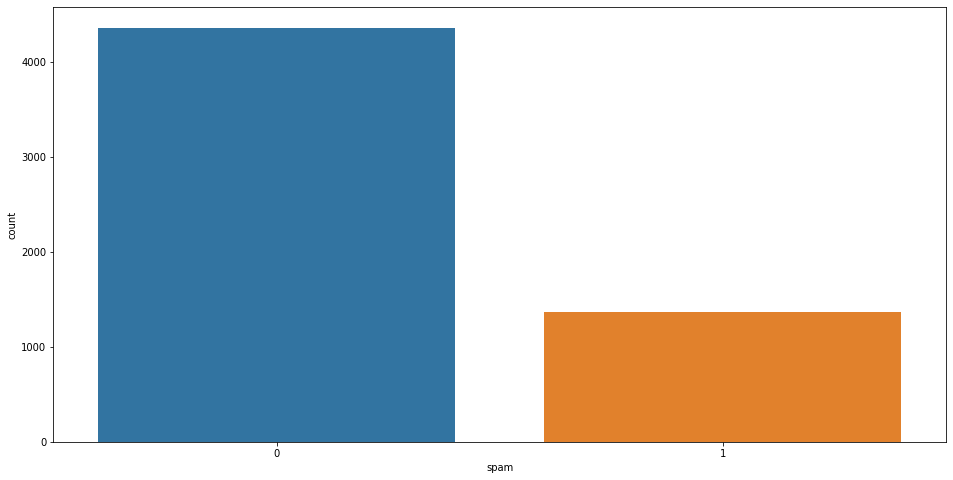

In [9]:
plt.figure(figsize=(16, 8))
sns.countplot(df.spam)
plt.show()

### Data Preparation

Use Count Vectorizer to convert word to number vector

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
X = df.text.values
y = df.spam.values

In [13]:
countvec = CountVectorizer()
X = countvec.fit_transform(X)

Train / Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Model Train and Evaluation

#### Train using all data and generate new test sample

In [17]:
from sklearn.naive_bayes import MultinomialNB

In [18]:
model = MultinomialNB()

In [19]:
model.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [23]:
test_sample = countvec.transform(['Hello, could you send me the report?', 'This is your only chance to get the reward'])
y_pred = model.predict(test_sample)
y_pred

array([0, 1])

#### Train using splitted data and evaluate the performance using test data

In [24]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
cm = confusion_matrix(y_test, y_pred)

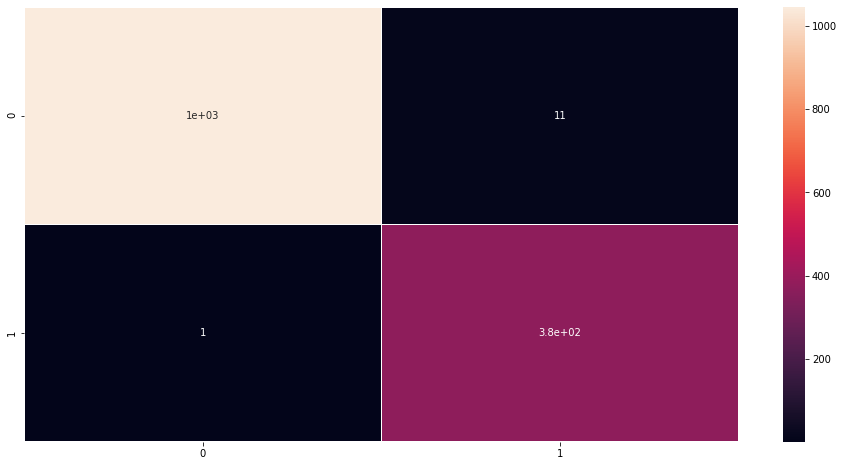

In [30]:
plt.figure(figsize=(16, 8))
sns.heatmap(cm, annot=True, linewidths=0.5)
plt.show()

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1056
           1       0.97      1.00      0.98       376

    accuracy                           0.99      1432
   macro avg       0.99      0.99      0.99      1432
weighted avg       0.99      0.99      0.99      1432

